# 导入工具包

In [1]:
# 数据读取及基本处理
import pandas as pd
import numpy as np

#查看数据分布是否对称/计算斜度/是否需要log或
from scipy.stats import skew

#可视化
import matplotlib.pyplot as plt
import seaborn as sns
# 显示文件图片
from IPython.display import display
# float显示三位小数 
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
from zhou_utils.utils_zhou import *
%matplotlib inline

In [2]:
# 设置一些全局的资源参数，可以进行个性化修改
import matplotlib

matplotlib.rc('figure', figsize = (6, 6))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

# 数据预处理

## 工具包及数据

In [3]:
# 导入必要工具包
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
# 导入评分工具
from sklearn.metrics import mean_squared_error

In [4]:
# 导入特征工程后的数据
data_FE = pd.read_csv("./data/train_FE.csv")
test = pd.read_csv("./data/test_FE.csv")

In [5]:
show_number_describe(data_FE)

共有：[359]条样本，特征数为：[45]，其中有[45]个特征是number
使用内存大小为: [126.29] KB


,count,mean,std,min,25%,50%,75%,max,dif_vals,dtype,num_null
instant,359,181.513,105.647,1.000,90.500,180.000,273.500,365.000,359,int64,0
temp,359,0.486,0.190,0.059,0.325,0.476,0.658,0.849,291,float64,0
atemp,359,0.467,0.169,0.079,0.322,0.467,0.614,0.841,347,float64,0
hum,359,0.639,0.146,0.000,0.538,0.642,0.739,0.973,326,float64,0
windspeed,359,0.190,0.076,0.022,0.136,0.186,0.234,0.507,343,float64,0
casual,359,686.474,556.351,9.000,236.500,634.000,876.500,3065.000,322,int64,0
registered,359,2751.153,1050.001,416.000,1772.000,2921.000,3638.500,4614.000,341,int64,0
cnt,359,3437.627,1364.356,431.000,2177.000,3750.000,4591.000,6043.000,346,int64,0
temp_div_atemp,359,1.029,0.055,0.748,1.008,1.033,1.068,1.191,358,float64,0
hum_mul_windspeed,359,0.119,0.051,0.000,0.083,0.112,0.147,0.326,359,float64,0


## 分离数据

In [6]:
# 分出 X, y
data_instant = data_FE["instant"]
X_data = data_FE.drop(["instant", "cnt","casual","registered"], axis=1)
y_data = data_FE["cnt"]

test_instant = test["instant"]
test_X = test.drop(["instant", "cnt","casual","registered"], axis=1)
test_y = test["cnt"]

In [7]:
#分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样25%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data
                                                    , random_state=33
                                                    , test_size=0.2)

## 标准化数据

In [8]:
# 标准化X
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()


X_train = ss_X.fit_transform(X_train)
X_test = ss_X.fit_transform(X_test)
#test_X = ss_X.fit_transform(test_X)

y_train = ss_y.fit_transform(y_train.to_frame())
y_test  = ss_y.fit_transform(y_test.to_frame())
#test_y  = ss_y.fit_transform(test_y.reshape(-1, 1))

# 模型选择

## LinearRegression

In [9]:

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

# 预测，下面计算score会自动调用predict
lr_y_predict_X_test = lr.predict(X_test)
lr_y_predict_X_train = lr.predict(X_train)
#lr_y_predict_test_X = lr.predict(test_X)
#显示特征的回归系数
lr.coef_

array([[ 2.11392623e+01, -9.09327517e+00, -2.33828435e-01,
        -3.03854302e-01,  1.45956218e+00,  1.77424843e-01,
        -4.82241870e+00, -2.80387045e+01, -2.68855345e-01,
         2.06052229e+01,  2.53825460e-01, -2.22563664e-01,
        -8.68702821e-02,  1.23320978e-01,  1.97216780e-01,
        -5.87671690e-02, -5.36921943e-02, -4.95109895e-02,
         1.95295623e-03,  1.32997186e-01,  1.28171014e-01,
         4.88572939e-02, -5.10628734e-04, -2.12778710e-03,
        -5.47570552e-02, -6.29574910e-02, -3.45660166e-02,
         3.27202580e-03, -3.27202580e-03, -3.13842266e-02,
        -2.42397138e-02,  3.95948458e-03,  6.68824581e-03,
         5.00227180e-03,  1.31648320e-02,  3.00204892e-02,
        -3.69941439e-03,  3.69941439e-03,  1.62805879e-01,
        -8.10274927e-02, -2.42774815e-01]])

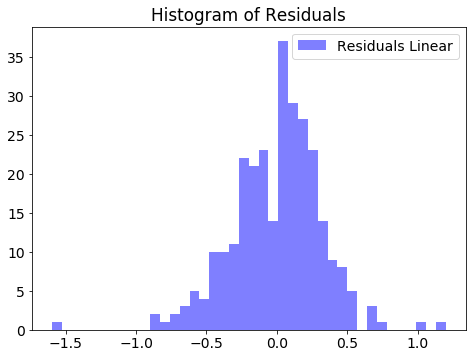

In [10]:
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - lr_y_predict_X_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

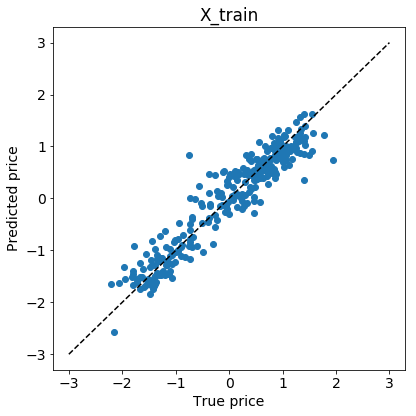

In [11]:
plt.scatter(y_train, lr_y_predict_X_train)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('X_train')
plt.tight_layout()

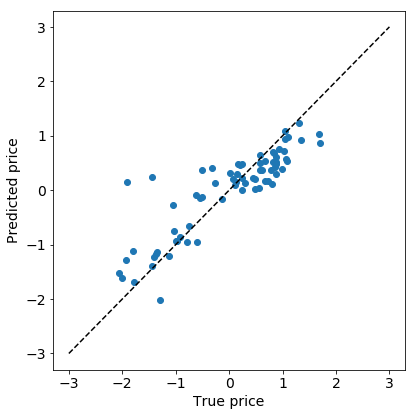

In [12]:
plt.scatter(y_test, lr_y_predict_X_test)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

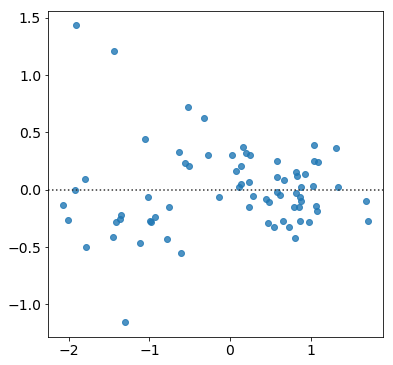

In [13]:
sns.residplot(y_test, lr_y_predict_X_test)

In [14]:
print("The lr on train is %f" % lr.score(X_train, y_train))
print("The lr on test is %f" % lr.score(X_test, y_test))
#print("The lr on 2012 is %f" % lr.score(test_X, test_y))

# print(((y_test - lr_y_predict) **2 ).sum())
# print(((y_test - y_test.mean()) **2).sum())

The lr on train is 0.898139
The lr on test is 0.753497


默认的线性回归特别差,尝试其它线性回归模型 

## SGDRegressor

In [15]:
# 线性模型，随机梯度下降优化模型参数
# 随机梯度下降一般在大数据集上应用，其实本项目不适合用
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线
sgdr = SGDRegressor(max_iter=1000)

# 训练：参数估计
sgdr.fit(X_train, y_train.ravel())

# 预测
sgdr_y_predict = sgdr.predict(X_test)

sgdr.coef_

array([ 3.71303428e-01,  3.68702377e-01, -1.51865240e-01, -2.02992133e-01,
        9.28739235e-02,  9.31507446e-02, -5.81536169e-01,  5.03943991e-01,
       -6.19081967e-01,  5.06370924e-01,  3.40358174e-01, -2.18144596e-01,
       -9.90452118e-02,  1.18361901e-01,  2.10324459e-01, -6.20641347e-02,
       -8.61342485e-02, -8.32723874e-02,  2.27236977e-02,  1.73593125e-01,
        1.55945154e-01,  3.14981339e-02,  1.37999699e-02,  3.22498165e-02,
       -4.95667450e-02, -8.30662800e-02, -7.07698026e-02,  6.08285580e-03,
       -6.08285580e-03, -3.20304773e-02, -1.39687726e-02, -1.51174439e-04,
        9.25543486e-04,  1.29302311e-02,  8.30824496e-03,  2.66441112e-02,
       -7.70341881e-03,  7.70341881e-03,  2.00907801e-01, -1.14047530e-01,
       -2.59407813e-01])

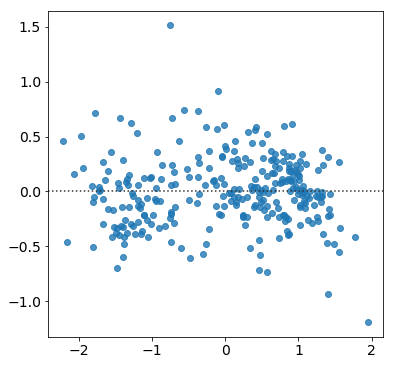

In [16]:
sns.residplot(y_train, sgdr.predict(X_train))

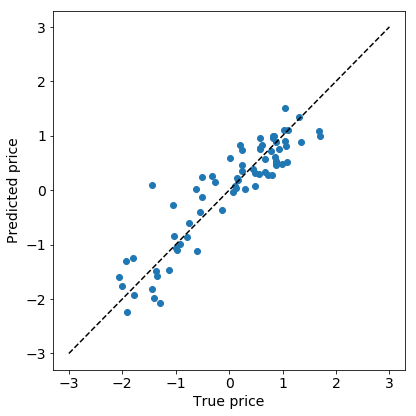

In [17]:
plt.scatter(y_test, sgdr_y_predict)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

In [18]:
print("The lr on train is %f" % sgdr.score(X_train, y_train))
print("The lr on test is %f" % sgdr.score(X_test, y_test))
#print("The lr on 2012 is %f" % sgdr.score(test_X, test_y))

The lr on train is 0.884726
The lr on test is 0.831284


## RidgeCV

In [19]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

#alphas = [0.01, 0.07, 0.09, 0.1, 0.2, 0.3, 1, 10, 100, 1000] #alphas=0.01
alphas  = np.arange(0.005,0.05, 0.01)

reg = RidgeCV(alphas=alphas, store_cv_values=True)   
reg.fit(X_train, y_train)    

RidgeCV(alphas=array([0.005, 0.015, 0.025, 0.035, 0.045]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

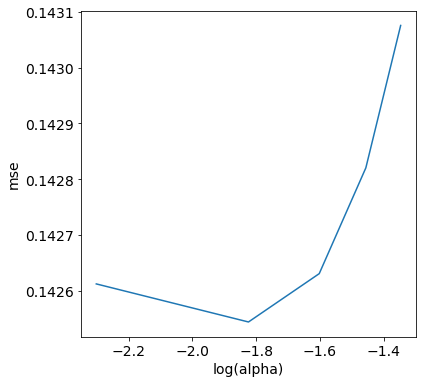

alpha is: 0.015


array([[ 2.64355046e+00,  4.51729369e+00, -1.96592737e-01,
        -2.70626580e-01,  2.77780136e-01,  1.40024728e-01,
        -1.38289045e+00, -2.71685437e+00, -2.17874860e+00,
        -5.55534843e-01,  2.42712377e-01, -2.25290909e-01,
        -9.36448889e-02,  1.23398623e-01,  2.07039171e-01,
        -4.50572251e-02, -5.60831491e-02, -6.06994860e-02,
         7.68716836e-03,  1.43287129e-01,  1.38062188e-01,
         4.59861166e-02,  4.64226290e-03,  4.98325489e-03,
        -6.26241125e-02, -7.92658550e-02, -4.68371703e-02,
         3.94285551e-03, -3.94285551e-03, -3.14523679e-02,
        -2.26735193e-02,  3.54804727e-03,  5.96991525e-03,
         7.01714472e-03,  1.37703136e-02,  2.68399954e-02,
        -6.30905857e-03,  6.30905857e-03,  1.66187030e-01,
        -8.53814524e-02, -2.40180712e-01]])

In [20]:
mse_mean = np.mean(reg.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', reg.alpha_)
reg.coef_

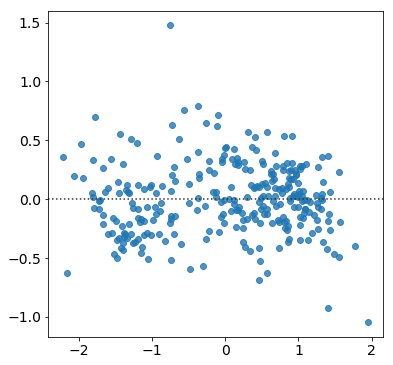

In [21]:
sns.residplot(y_train, reg.predict(X_train))

In [22]:
print("The reg on train is %f" % reg.score(X_train, y_train))
print ("The reg on test is %f" % reg.score(X_test, y_test))
#print ("The reg on 2012 is %f" % reg.score(test_X, test_y))

The reg on train is 0.895767
The reg on test is 0.842882


## LassoCV

In [23]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

alphas = [0.01, 0.1, 1, 10,100] #alphas = min
#alphas = [1.0e-8, 1.0e-6, 0.0001]
#alphas = np.arange(0.0005,0.005,0.0001)

lasso = LassoCV(alphas=alphas)   
lasso.fit(X_train, y_train.ravel())       

LassoCV(alphas=[0.01, 0.1, 1, 10, 100], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

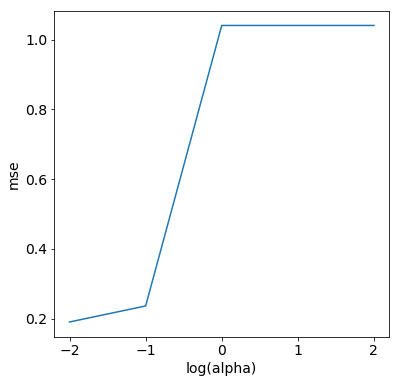

alpha is: 0.01


array([ 0.        ,  0.        , -0.03259654, -0.04354296,  0.01659746,
       -0.04780473, -0.        ,  0.50019822, -0.025453  ,  0.        ,
       -0.        , -0.23619054, -0.        ,  0.09936893,  0.15353236,
       -0.03025855, -0.03785941, -0.04020884,  0.        ,  0.13695207,
        0.09378874, -0.02055789,  0.        ,  0.0554864 ,  0.02548829,
        0.        , -0.00631438,  0.01019485, -0.        , -0.03307558,
       -0.01044696, -0.        ,  0.        ,  0.        ,  0.00677852,
        0.02058673, -0.        ,  0.        ,  0.13650048, -0.        ,
       -0.15010948])

In [24]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)
lasso.coef_  

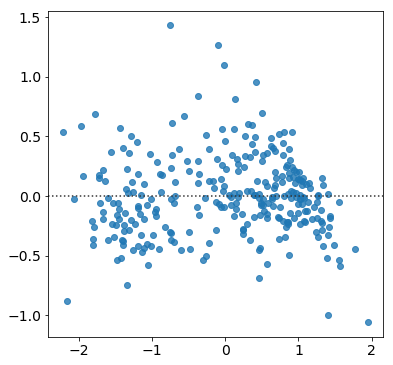

In [25]:
sns.residplot(y_train, lasso.predict(X_train))

In [26]:
print("The reg on train is %f" % lasso.score(X_train, y_train))
print ('The reg on test is %f'% lasso.score(X_test, y_test))
#print ('The reg on 2012 is %f'% lasso.score(test_X, test_y))

The reg on train is 0.856094
The reg on test is 0.821079


# 结论

RidgeCV 在test上的R^2=0.842882
比其它模型更好
应当选择RidgeCV

## 重新在整个data(2011)数据集上做训练 

In [27]:
# 导入特征工程后的数据
data_FE = pd.read_csv("./data/train_FE.csv")
test = pd.read_csv("./data/test_FE.csv")

In [28]:
# 分出 X, y
data_instant = data_FE["instant"]
X_data = data_FE.drop(["instant", "cnt","casual","registered"], axis=1)
y_data = data_FE["cnt"]

test_instant = test["instant"]
test_X = test.drop(["instant", "cnt","casual","registered"], axis=1)
test_y = test["cnt"]

In [30]:
# 标准化X
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()


X_train = ss_X.fit_transform(X_data)
X_test = ss_X.fit_transform(test_X)
#test_X = ss_X.fit_transform(test_X)

y_train = ss_y.fit_transform(y_data.to_frame())
y_test  = ss_y.fit_transform(test_y.to_frame())
#test_y  = ss_y.fit_transform(test_y.reshape(-1, 1))

In [31]:
# 重新在整个数据集上训练
from sklearn.linear_model import  RidgeCV

#alphas = [0.01, 0.07, 0.09, 0.1, 0.2, 0.3, 1, 10, 100, 1000] #alphas=0.01
#alphas  = np.arange(0.005,0.05, 0.01) #alphas=0.015
alphas  = np.arange(0.010, 0.020, 0.001)
reg = RidgeCV(alphas=alphas, store_cv_values=True)   
reg.fit(X_train, y_train)  

RidgeCV(alphas=array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [38]:
np.mean(reg.cv_values_, axis = 0).ravel()

array([0.1498848 , 0.14970874, 0.14954803, 0.14940083, 0.14926559,
       0.14914104, 0.14902611, 0.14891988, 0.14882156, 0.14873047])

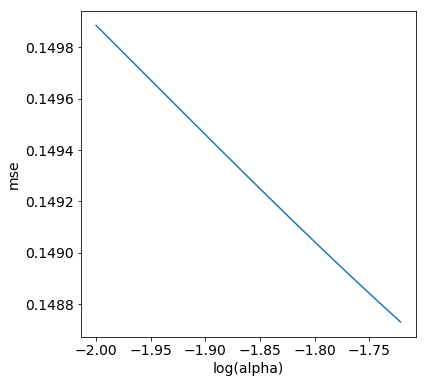

alpha is: 0.018999999999999993


array([[ 3.02880721e+00,  3.78096400e+00, -1.83777293e-01,
        -2.19188589e-01,  1.87047406e-01,  9.07792076e-02,
        -1.73117951e+00, -1.99936096e+00, -1.68950067e+00,
        -1.04303935e+00,  2.37377390e-01, -2.19359256e-01,
        -6.54329405e-02,  1.04311395e-01,  1.83033160e-01,
        -8.79920578e-02, -6.51825593e-02, -7.64257151e-02,
        -2.02997651e-02,  1.37575610e-01,  1.46609427e-01,
         7.03356320e-02,  2.66398511e-02,  2.96905807e-02,
        -2.73500261e-02, -9.51369730e-02, -3.97393260e-02,
         1.81410275e-02, -1.81410275e-02, -2.38368058e-02,
        -1.40606798e-02,  6.42607414e-03, -2.65220584e-03,
         1.71796053e-04,  8.87846131e-03,  2.52870008e-02,
        -5.48316900e-03,  5.48316900e-03,  1.51941959e-01,
        -8.13825460e-02, -2.11200197e-01]])

In [39]:
mse_mean = np.mean(reg.cv_values_, axis = 0).ravel()
plt.plot(np.log10(alphas), mse_mean) 
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', reg.alpha_)
reg.coef_

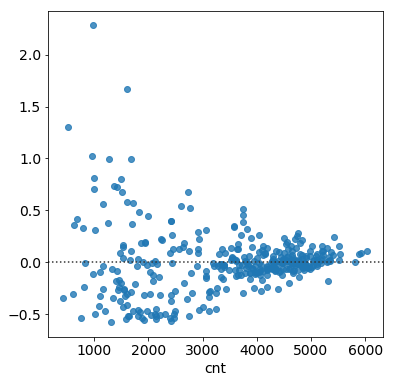

In [33]:
sns.residplot(y_data, reg.predict(X_data))

In [34]:
print ('The R^2 of RidgeCV on 2011 is %f'% reg.score(X_data, y_data))

The R^2 of RidgeCV on 2011 is -6.361513


In [35]:
print ('The R^2 of RidgeCV on 2012 is %f'% reg.score(test_X, test_y))

The R^2 of RidgeCV on 2012 is -9.824433
